# Gradient Descent

Gradient Descent is an important iterative 1st order optimization technique that was initially conceived for use in minimising convex functions without constraints.

In this lab, we will look at the use of gradient descent using PyTorch. You will also get practice tracing through instances of gradient descent by hand

## Automatic Differentiaion

There are three main ways to compute derivatives:
1. Symbolically - by using algebraic rules to generate or derive the derivative
2. Numerically - using calculations to approximate the derivative at a point
3. Automatically - using the structure of code used to implement a function to derive its gradient

Most machine learning techniques use automatic differentiaion to help ease implementation. Automatic differentation works by assebling a computation graph. For example, the function $f(x) = x_1 + x_2$ may be represented by the following computation graph:

![Simple Computation Graph](img/compgraph1.png)

## PyTorch
PyTorch is a library for tensor manipulation and automatic differentiation. There are some vital concepts from PyTorch that we will use throughout the course:
1. tensor - the primary means of storing data for tensor manipulation in Pytorch
2. parameter - these are "trainable" tensors that can gave gradients that can be passed to an optimizer
3. model - used to represent a sequence of operations on paramters and input
4. optimizer - an algorithm that is used to train paramters based on their gradient with respect to some loss function

### Example

Consider the function $f(x) = 2x^2 + 3x - 4$. Suppose that we wish to minimize this function. Our parameter here will be our $x$, and our loss is $f$. We have several way of abstracting this in accord with PyTorch's facilities and standards. What we will see is but one way of doing so

In [71]:
%pylab inline
import torch as th
import torch.optim as optim
import torch.nn as nn
import numpy as np

def plot_loss_curve(loss_curve):
    plt.plot(list(range(len(loss_curve))), loss_curve)


Populating the interactive namespace from numpy and matplotlib


In [77]:
# set up model with parameter and loss function

def f(x):
    return 2 * x * x + 3 * x - 4
    

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        x = th.tensor(np.random.random()) # generate random point
        self.x = nn.Parameter(x)
    
    def loss(self):
        return f(self.x)

In [78]:
model = MyModel() # model instance
lr = 0.1 # our learning rate 
loss_curve = []
optimizer = optim.SGD(model.parameters(), lr=lr)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad() # zero out gradients to prevent gradients from carrying over into other iterations
    loss = model.loss() # compute loss
    loss.backward() # compute gradient with respect to loss function
    loss_curve.append(loss.item())
    optimizer.step() # use gradient descent to adjust value of paramters in model

print('Our final x^* is ', model.x.data)

Our final x^* is  tensor(-0.7500)


Text(0.5, 1.0, 'Loss curve')

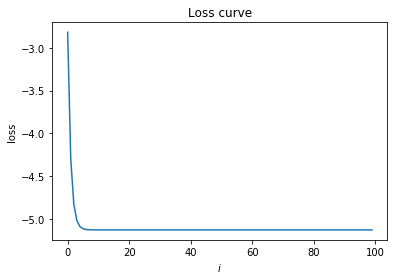

In [79]:
plot_loss_curve(loss_curve)
plt.xlabel('$i$')
plt.ylabel('loss')
plt.title('Loss curve')

Our loss curve above can be ploted to show how the loss is decreasing per epoch

### Multivariable case
As mentioned in class, gradient descent is trivially extensible to multivariable, vector, and matrix settings once the output of the loss function is real scalar value.

For an example, we shall first consider function $f(x, y) = (x^2 + y^2) + 4

In [80]:
def loss_function(x, y):
    return (x ** 2 + y ** 2) + 4


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        x = th.tensor(np.random.random()) # generate x co-ordinate of random point
        y = th.tensor(np.random.random()) # generate y co-ordinate of random point
        self.x = nn.Parameter(x)
        self.y = nn.Parameter(y)
        
    def loss(self):
        return loss_function(self.x, self.y)

In [81]:
model = MyModel() # model instance
lr = 0.05 # our learning rate 
loss_curve = []
optimizer = optim.SGD(model.parameters(), lr=lr)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad() # zero out gradients to prevent gradients from carrying over into other iterations
    loss = model.loss() # compute loss
    loss.backward() # compute gradient with respect to loss function
    loss_curve.append(loss.item())
    optimizer.step() # use gradient descent to adjust value of paramters in model

print('Our final x^* is ', model.x.data)
print('Our final y^* is ', model.y.data)

Our final x^* is  tensor(1.8336e-05)
Our final y^* is  tensor(1.5753e-05)


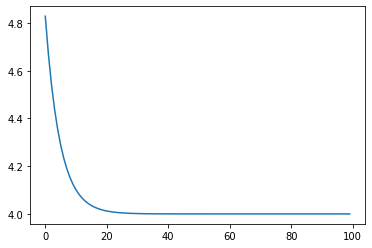

In [82]:
plot_loss_curve(loss_curve)

### Vector case

Not the above function could have been written as $f(x) = (x_{1}^{2} + x_{2}^{2})^{2} + 4$. Instead of separating out the paramters into seperate variables, we could have kept together as a vector

In [89]:
def loss_function(x):
    return (x[0] ** 2 + x[1] ** 2) + 4


class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        x = th.tensor(np.random.random(2)) # generate random point
        self.x = nn.Parameter(x)
        
    def loss(self):
        return loss_function(self.x)
    
model = MyModel() # model instance
lr = 0.05 # our learning rate 
loss_curve = []
optimizer = optim.SGD(model.parameters(), lr=lr)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad() # zero out gradients to prevent gradients from carrying over into other iterations
    loss = model.loss() # compute loss
    loss.backward() # compute gradient with respect to loss function
    loss_curve.append(loss.item())
    optimizer.step() # use gradient descent to adjust value of paramters in model

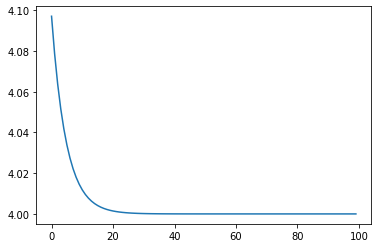

In [90]:
plot_loss_curve(loss_curve)

In [91]:
print('Our final x^* is ', model.x.data)

Our final x^* is  tensor([5.5343e-06, 6.1528e-06], dtype=torch.float64)


## Excercises

1. Write code to **maximize** the function $f(x) = -(x_{1}^{2} + x_{2}^{2} + x_{1}x_{2})^{2} - 4$. Hint recall that gradient descent minimizes functions. Recall from the lecture how we can transform minimization problems into maximization problems and vice versa.
2. Trace through the following instances of gradient descent by hand for 2 epochs:
    1. minimizing $f(x) =  x^3 - 2x + 4$, $x \in \mathbb{R}$ where $\alpha = 0.1$, and you start at $x = -4$
    2. minimizing $f(x) = (2-x_1)^{2}+10(x_2-x_{1}^{2})^{2}$, $x \in \mathbb{R}^{2}$, $\alpha = 0.1$, and you start at $x = \begin{bmatrix}1 \\ 1\end{bmatrix}$